Question 2) Salary_hike -> Build a prediction model for Salary_hike Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: xlabel='Salary', ylabel='Density'>

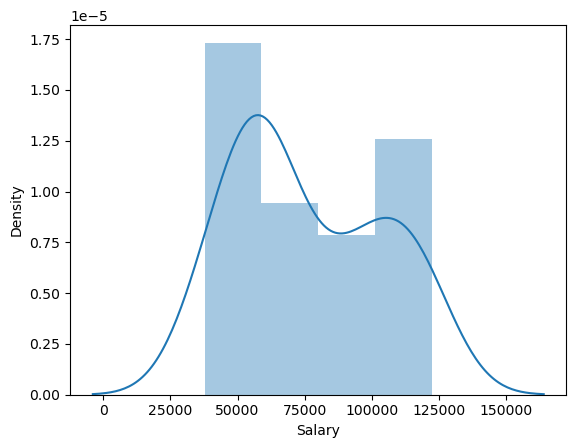

In [4]:
sns.distplot(df['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

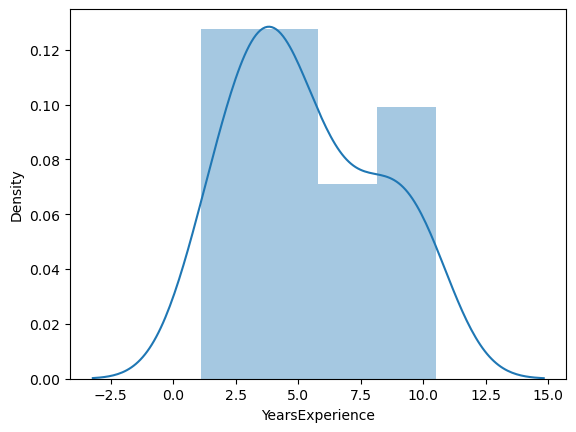

In [5]:
sns.distplot(df['YearsExperience'])


In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
df=df.rename({'YearsExperience':'years_exp', 'Salary':'salary_hike'},axis=1)
df


,years_exp,salary_hike
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


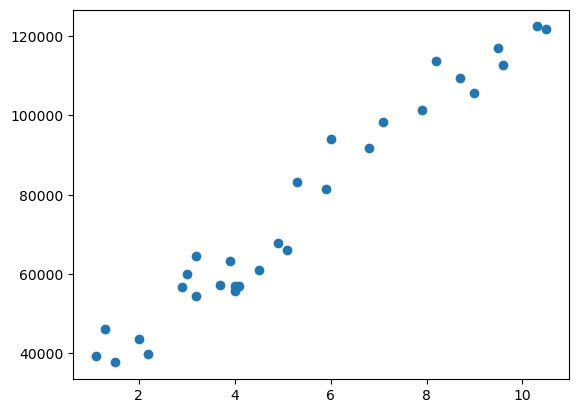

In [8]:
plt.scatter(df.years_exp,df.salary_hike)


Model Prepdicition

                            OLS Regression Results                            
Dep. Variable:      df['salary_hike']   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.14e-20
Time:                        13:18:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

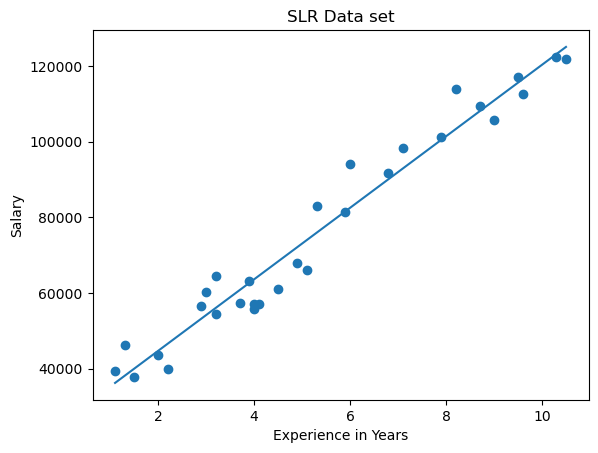

In [9]:
slr_model=smf.ols("df['salary_hike']~df['years_exp']",data=df).fit()
print(slr_model.summary())
predict=slr_model.predict(df.iloc[:,0])

plt.scatter(df['years_exp'],df['salary_hike'])
plt.plot(df['years_exp'],predict)
plt.title("SLR Data set")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

Log Model

                            OLS Regression Results                            
Dep. Variable:      df['salary_hike']   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           3.25e-13
Time:                        13:18:15   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

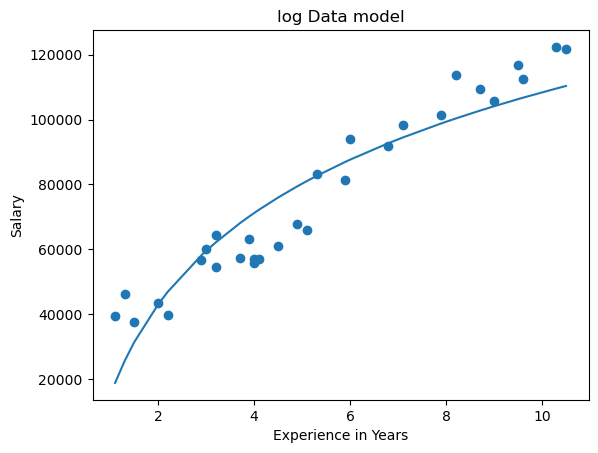

In [10]:
log_model=smf.ols("df['salary_hike']~np.log(df['years_exp'])", data=df).fit()
print(log_model.summary())
log_predict=log_model.predict(pd.DataFrame(df['years_exp']))

plt.scatter(df['years_exp'],df['salary_hike'])
plt.plot(df['years_exp'],log_predict)
plt.title("log Data model")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

Exponential Model

                                OLS Regression Results                               
Dep. Variable:     np.log(df['salary_hike'])   R-squared:                       0.932
Model:                                   OLS   Adj. R-squared:                  0.930
Method:                        Least Squares   F-statistic:                     383.6
Date:                       Fri, 17 Nov 2023   Prob (F-statistic):           7.03e-18
Time:                               13:18:18   Log-Likelihood:                 28.183
No. Observations:                         30   AIC:                            -52.37
Df Residuals:                             28   BIC:                            -49.56
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

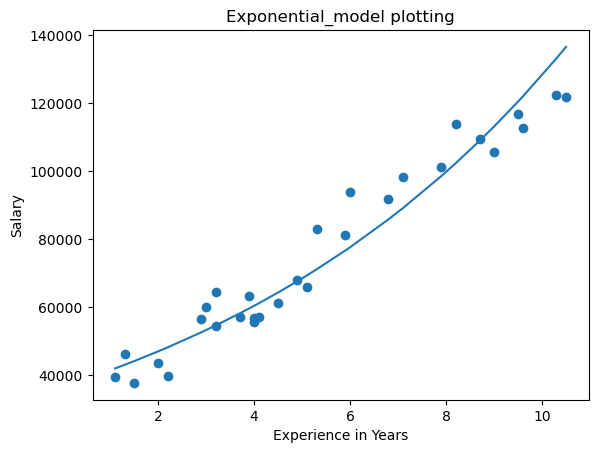

In [11]:
exp_model=smf.ols("np.log(df['salary_hike'])~df['years_exp']", data=df).fit()
print(exp_model.summary())
exp_predict=exp_model.predict(pd.DataFrame(df['years_exp']))
pred_exp=np.exp(exp_predict)

plt.scatter(df['years_exp'],df['salary_hike'])
plt.plot(df['years_exp'],np.exp(exp_predict))
plt.title("Exponential_model plotting")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

In [ ]:
slr_regression=linear_model.LinearRegression()
slr_regression.fit(df[['years_exp']],df.salary_hike)

flag=True
while(flag):
    myinput=float(input("Enter Years of Experience"))
    myoutput=slr_regression.predict([[myinput]])
    print("Salary Hike precited using1 SLR is: ",myoutput)
    flag=int(input("press 1 to continue or press 0 to exit: "))
    

RMSE

In [ ]:
np.sqrt(np.mean((df.years_exp-predict)**2))


In [ ]:
np.sqrt(np.mean((df.years_exp-pred_exp)**2))

In [ ]:
np.sqrt(np.mean((df.years_exp-log_predict)**2))